In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the training dataset
df = pd.read_csv('fraudTrain.csv')
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#Reading the testing dataset
df_test = pd.read_csv('fraudTest.csv')
df_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
#Checking for null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
#Renaming some columns in dataset
df.rename(columns={'trans_date_trans_time':'transaction_time',
                         'cc_num':'credit_card_number',
                         'amt':'amount'}, inplace=True)

In [10]:
#Typecasting the necessary variables
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [11]:
#Extracting new features
df['trans_hour'] = df['transaction_time'].dt.hour
df['trans_month'] = df['transaction_time'].dt.month
from datetime import datetime
df['time'] = df['unix_time'].apply(datetime.utcfromtimestamp)

In [12]:
#Age of the cardholder
df['cust_age'] = (df['transaction_time'] - df['dob']).astype('timedelta64[Y]')
df['cust_age'].head(5)

0    30.0
1    40.0
2    56.0
3    51.0
4    32.0
Name: cust_age, dtype: float64

In [13]:
np.round(df.describe(), 2)

,credit_card_number,amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_month,cust_age
count,1.296675e+06,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1.296675e+06,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.0
mean,4.171920e+17,70.35,48800.67,38.54,-90.23,88824.44,1.349244e+09,38.54,-90.23,0.01,12.80,6.14,45.5
std,1.308806e+18,160.32,26893.22,5.08,13.76,301956.36,1.284128e+07,5.11,13.77,0.08,6.82,3.42,17.4
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00,0.00,1.00,13.0
25%,1.800429e+14,9.65,26237.00,34.62,-96.80,743.00,1.338751e+09,34.73,-96.90,0.00,7.00,3.00,32.0
50%,3.521417e+15,47.52,48174.00,39.35,-87.48,2456.00,1.349250e+09,39.37,-87.44,0.00,14.00,6.00,43.0
75%,4.642255e+15,83.14,72042.00,41.94,-80.16,20328.00,1.359385e+09,41.96,-80.24,0.00,19.00,9.00,57.0
max,4.992346e+18,28948.90,99783.00,66.69,-67.95,2906700.00,1.371817e+09,67.51,-66.95,1.00,23.00,12.00,95.0


## =====================================================================

### Exploratory Data Analysis

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

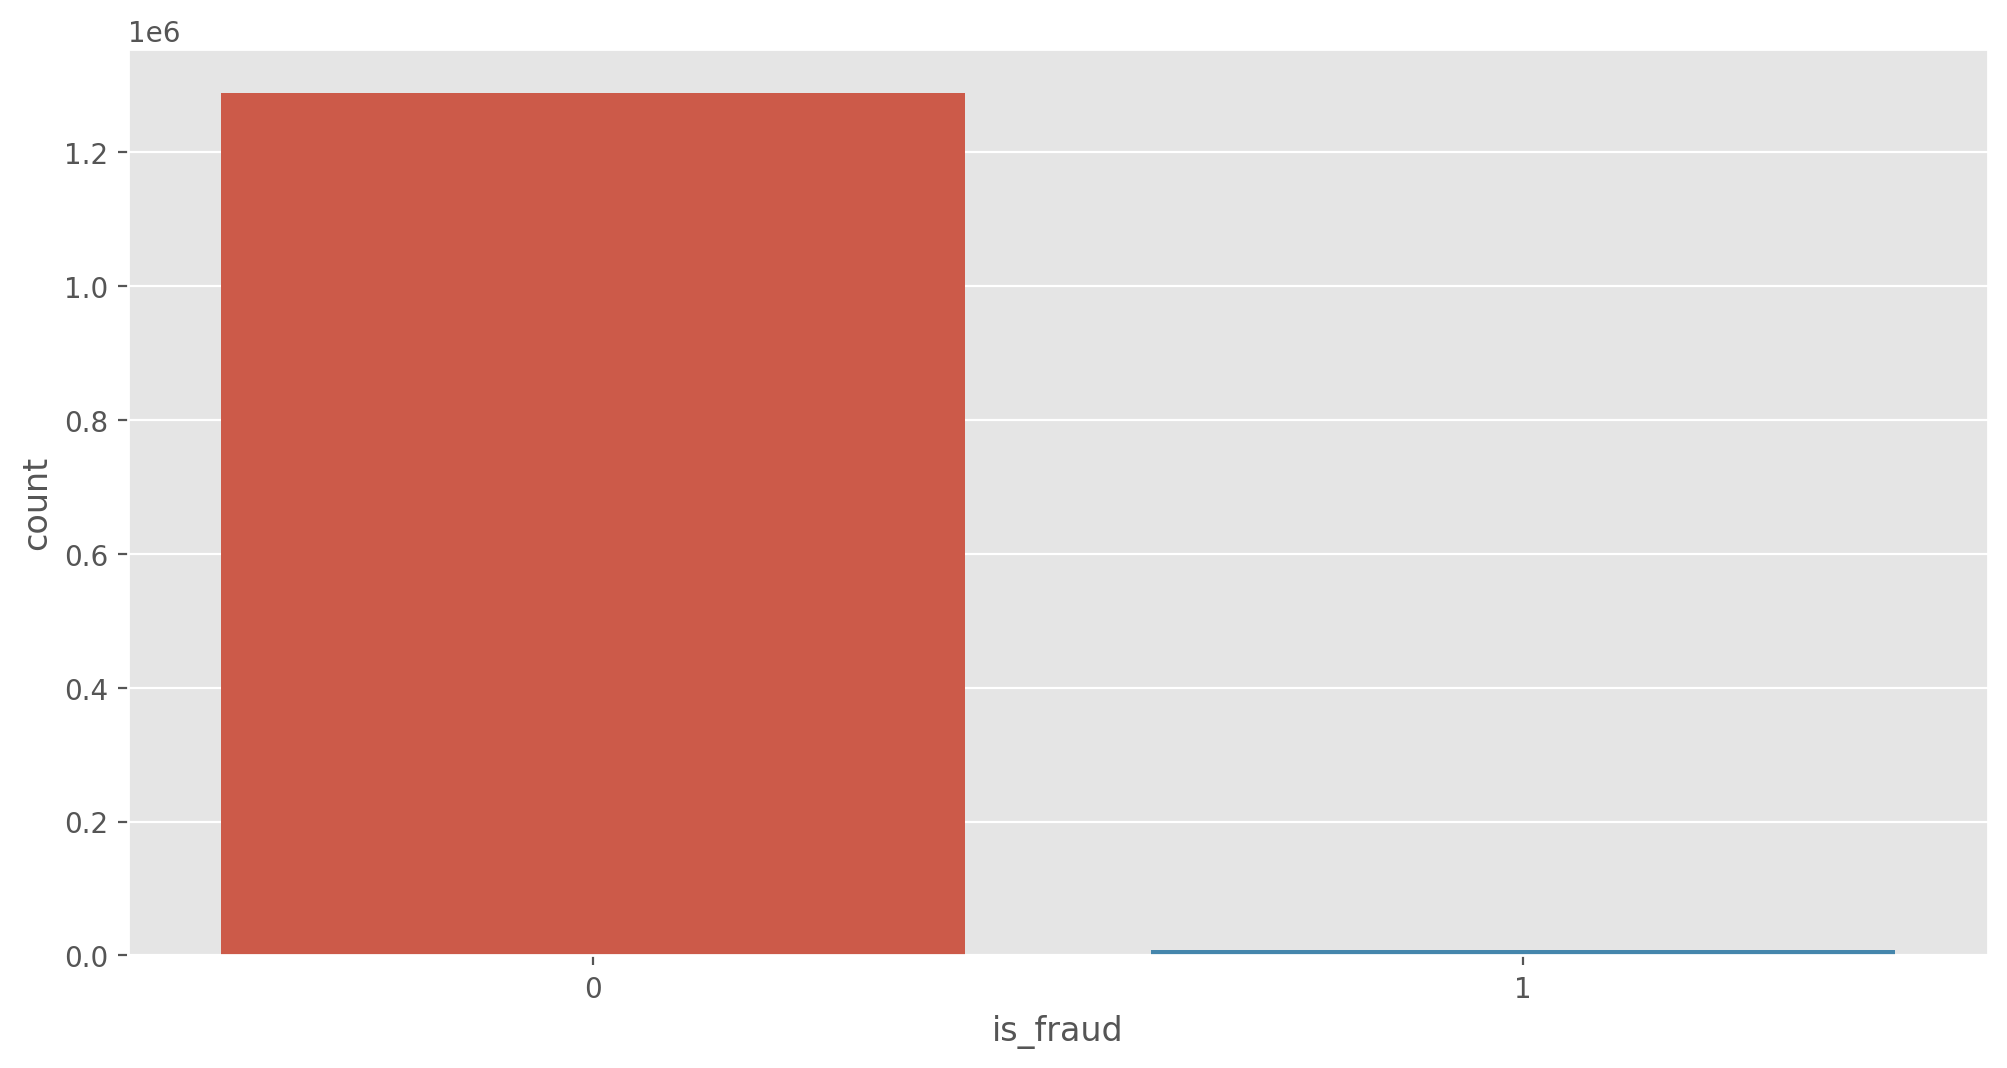

In [14]:
# is_fraud Class distribution
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(df.is_fraud)

Here, we can see that the data is highly imbalanced. So, we have to perform resampling.

In [15]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [16]:
# Gender distribution of card holder
normal = df[(df.is_fraud==0)].gender.value_counts().sort_index()
fraud = df[(df.is_fraud==1)].gender.value_counts().sort_index()
print('Normal transactions :')
print(normal)
print('Fraud transactions  :')
print(fraud)

Normal transactions :
F    706128
M    583041
Name: gender, dtype: int64
Fraud transactions  :
F    3735
M    3771
Name: gender, dtype: int64


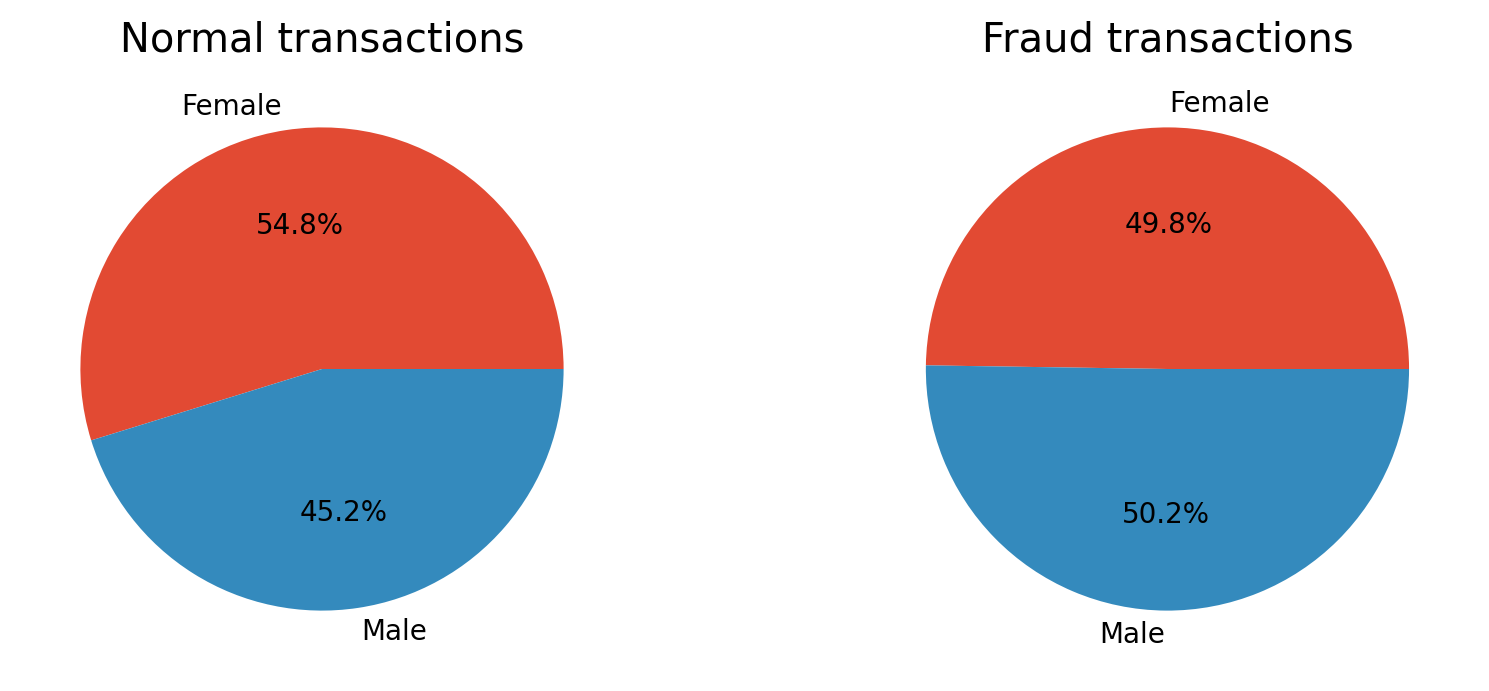

In [17]:
plt.figure(figsize = (10,4), dpi = 200)

plt.subplot(1,2,1)
plt.pie(normal, labels = ['Female','Male'], autopct = '%1.1f%%')
plt.title('Normal transactions')
plt.subplot(1,2,2)
plt.pie(fraud, labels = ['Female','Male'], autopct = '%1.1f%%')
plt.title('Fraud transactions')
plt.show()

The fraud transactions is almost similarly distributed amoung male and female card holders.

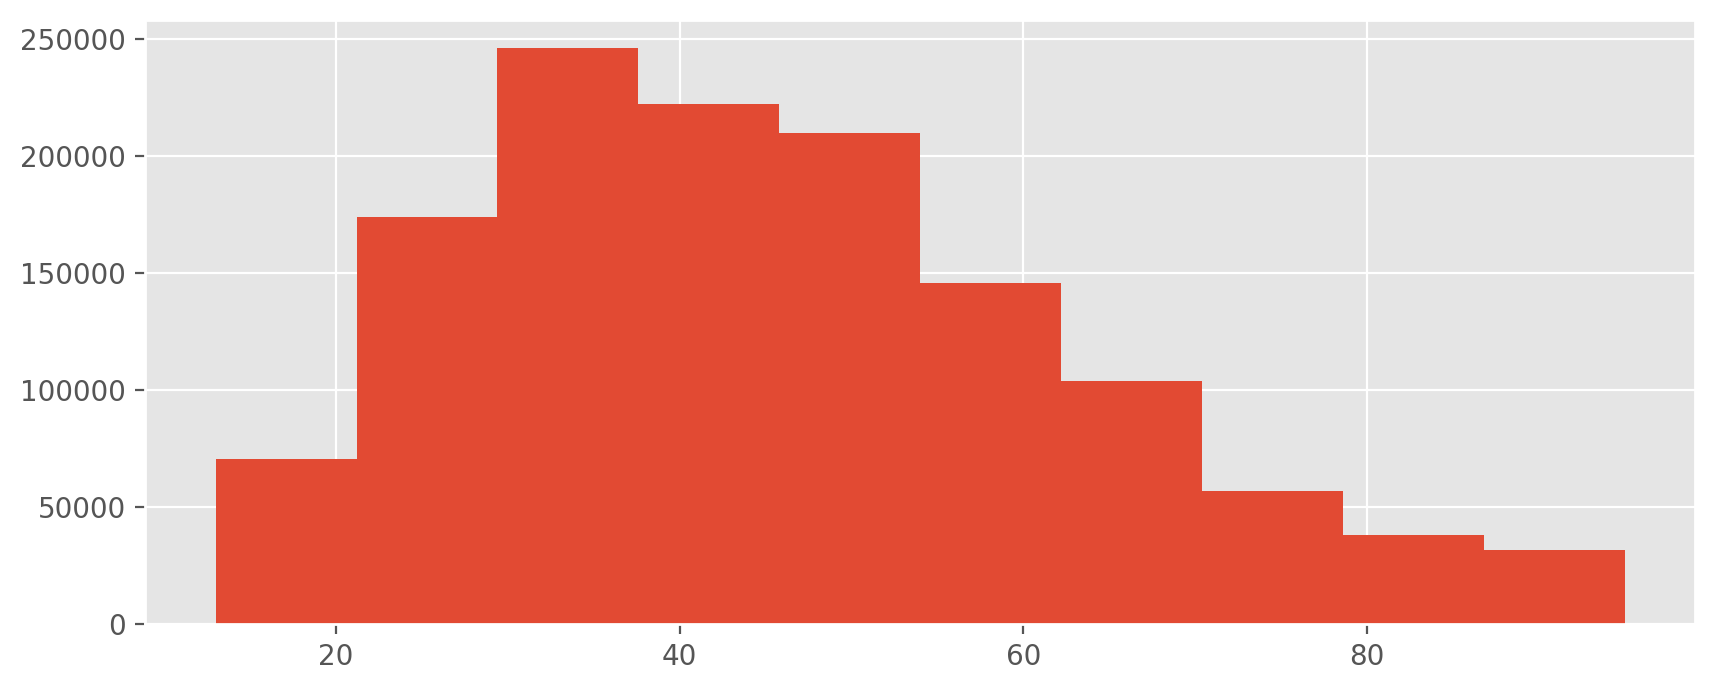

In [18]:
#Age of the cardholder
plt.figure(figsize = (10,4), dpi = 200)
plt.hist(df.cust_age)
plt.show()

The transctions are majorly from people whose age is in the range of 30 - 50.

<AxesSubplot:xlabel='trans_hour', ylabel='is_fraud'>

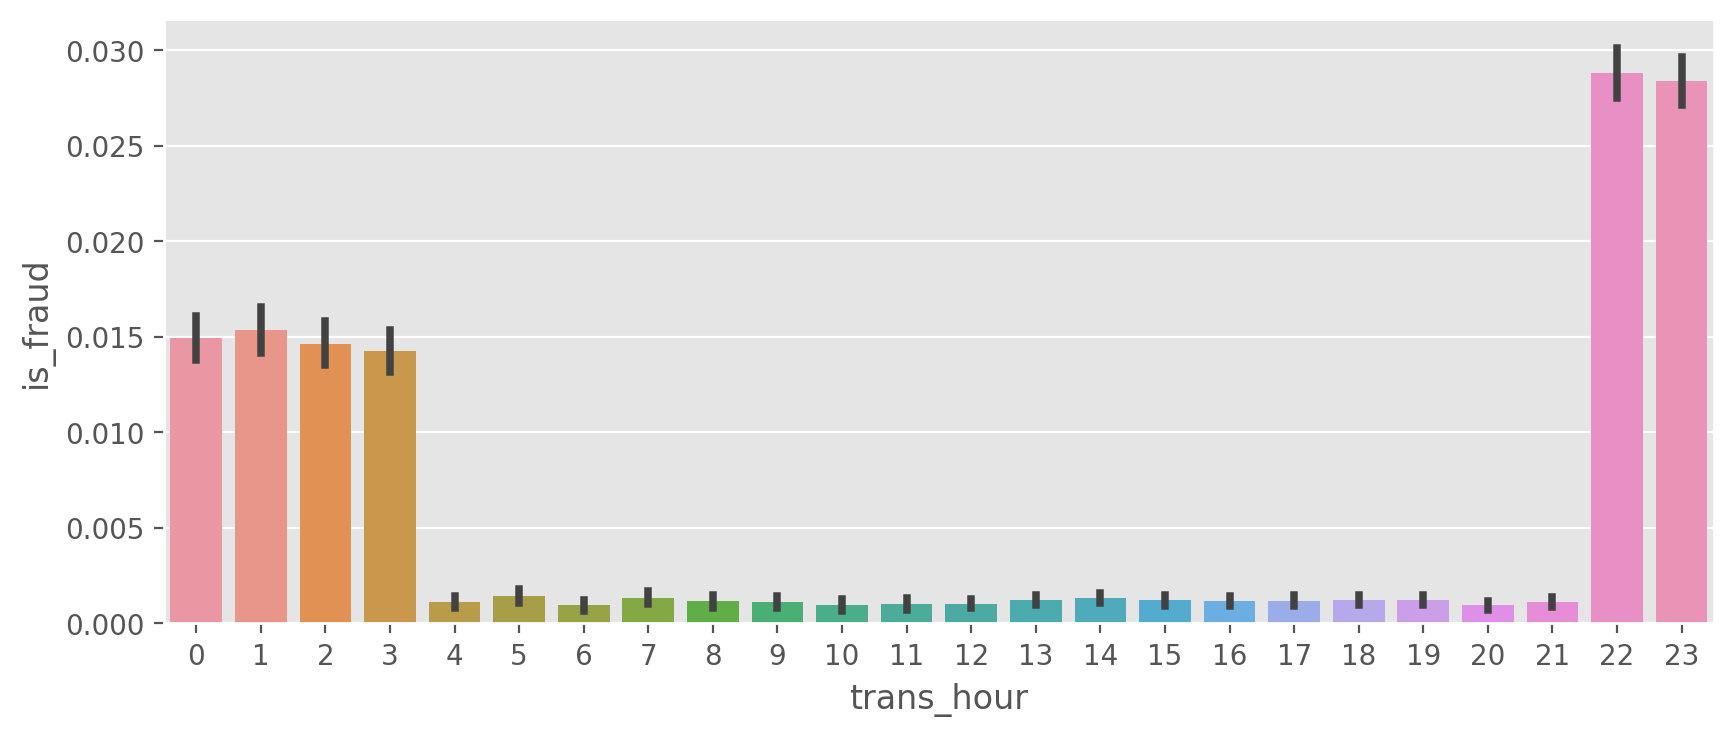

In [19]:
#Hours of transactions
plt.figure(figsize = (10,4), dpi = 200)
sns.barplot('trans_hour', 'is_fraud', data = df)

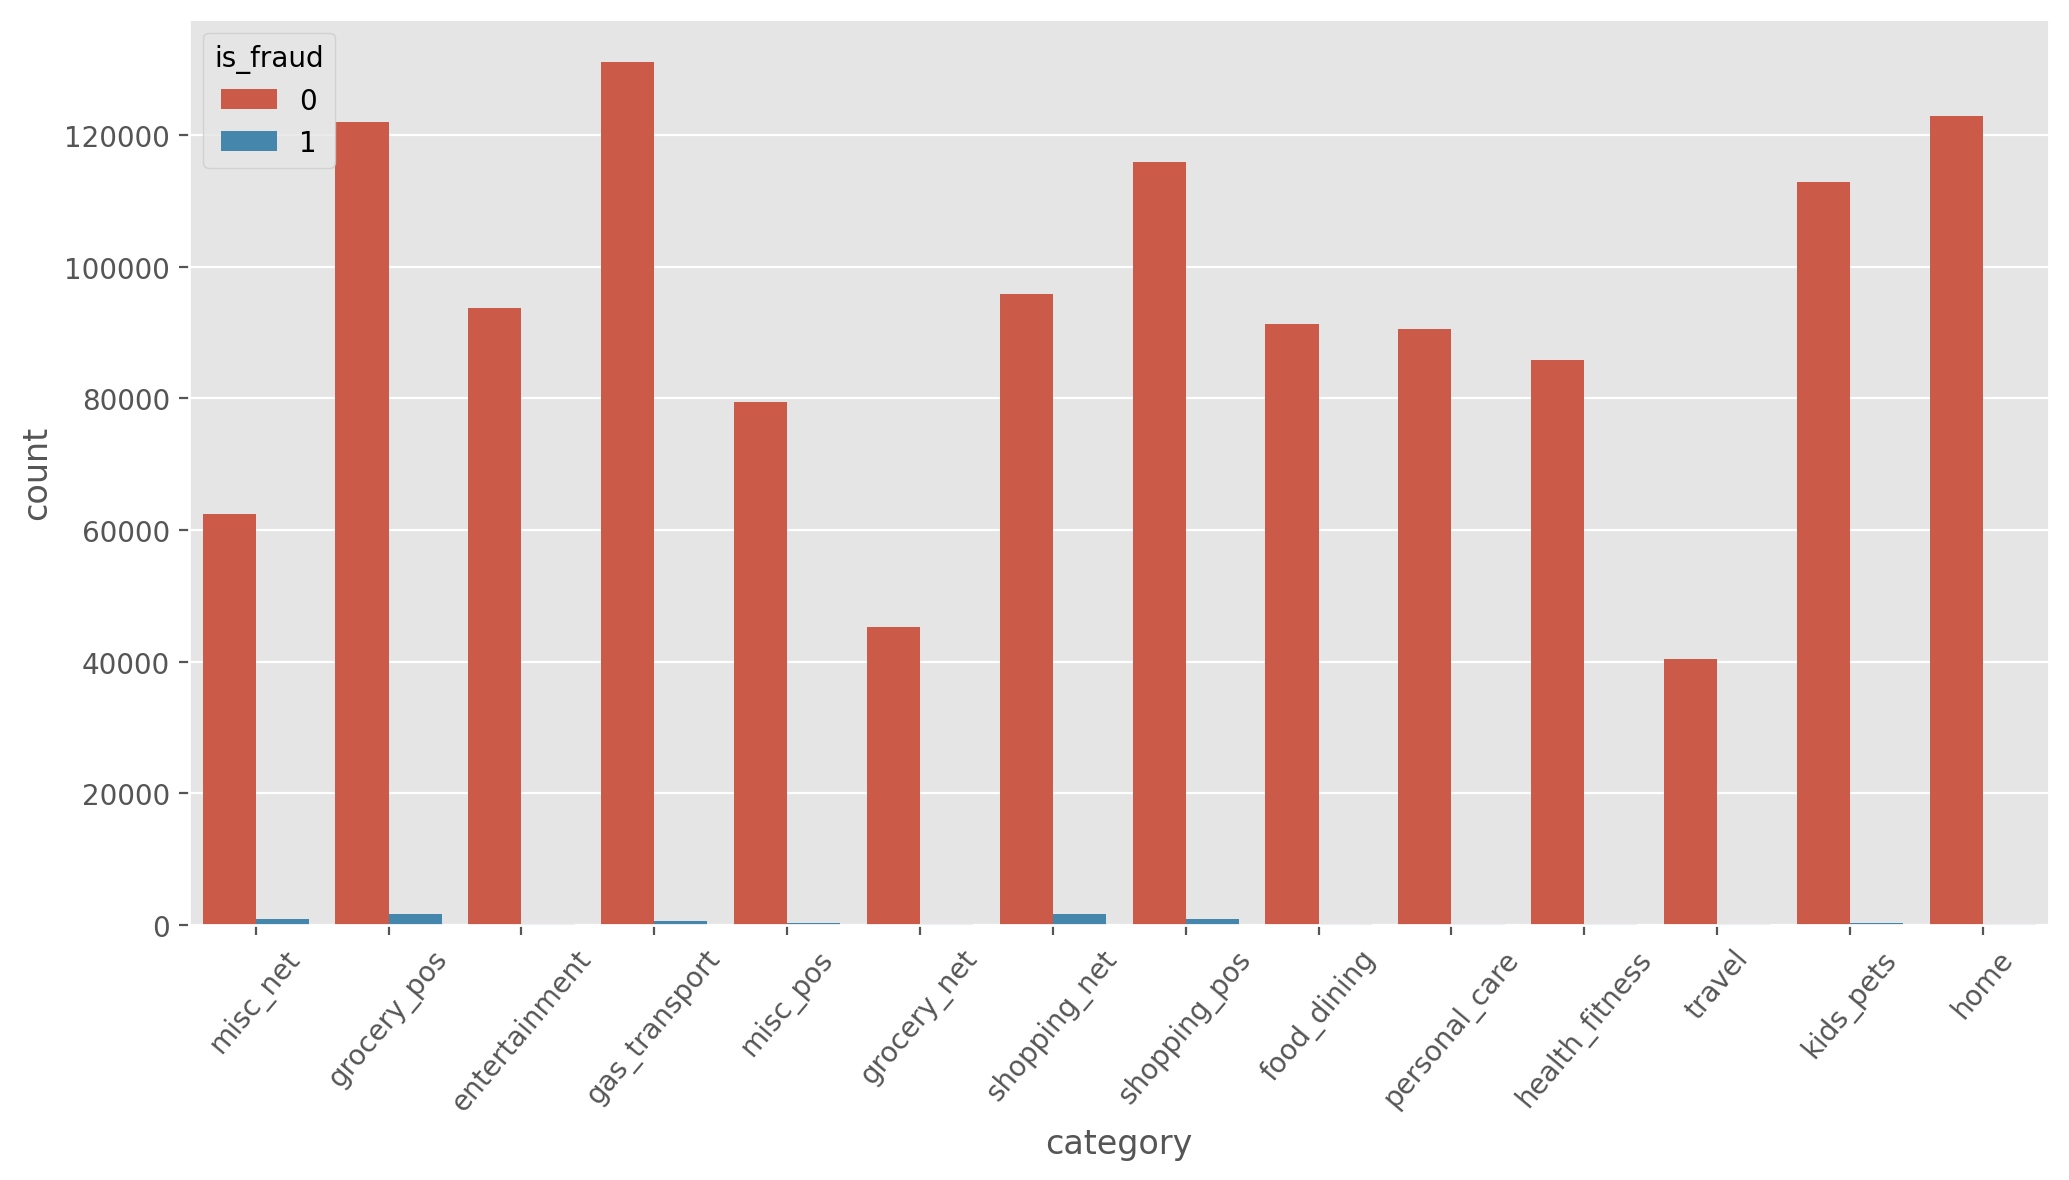

In [20]:
#Category distribution based on fraud and non-fraud cases
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot('category',hue = 'is_fraud', data = df)
plt.xticks(rotation = 50)
plt.show()

The normalized percentage of the grocery_pos, shopping_pos, shopping_net, misc_net are higher for fraud transactions

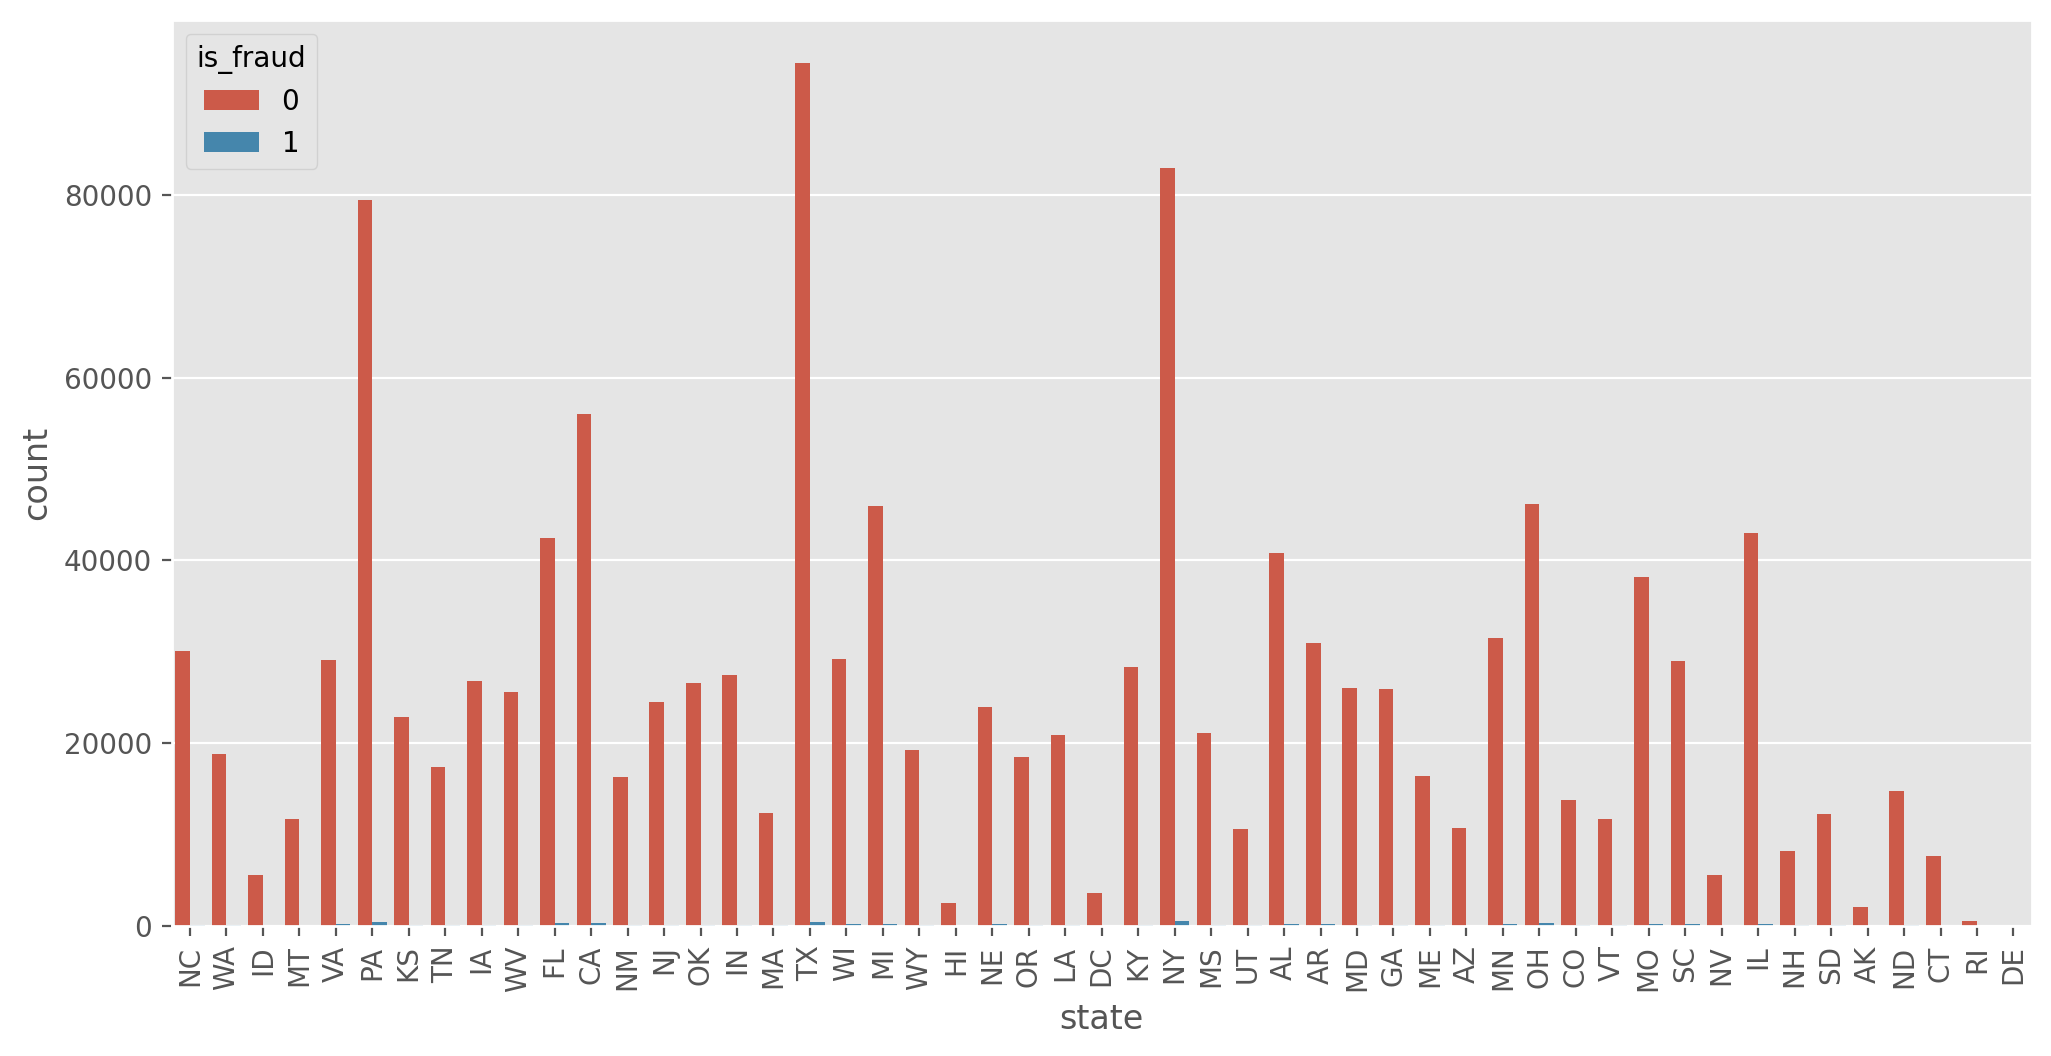

In [21]:
#State distribution
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot('state',hue = 'is_fraud', data = df)
plt.xticks(rotation = 90)
plt.show()

In [22]:
#Which job has more fraud detection
groups = ['is_fraud','job']
df_job = df.groupby(by=groups).agg({'amount':'mean','trans_num':'count'}).fillna(0).reset_index()

df_job = df_job[df_job.is_fraud == 1].sort_values(by= 'trans_num',
                                       ascending=False).drop_duplicates('job', keep='first').iloc[:10, :]
df_job

,is_fraud,job,amount,trans_num
731,1,Materials engineer,561.092097,62
903,1,Trading standards officer,478.137143,56
752,1,Naval architect,653.563962,53
642,1,Exhibition designer,524.067255,51
871,1,"Surveyor, land/geomatics",510.914800,50
732,1,Mechanical engineer,531.585714,49
791,1,Prison officer,453.897500,48
820,1,Quantity surveyor,591.754167,48
512,1,Audiological scientist,660.311739,46
854,1,Senior tax professional/tax inspector,629.589778,45


<AxesSubplot:>

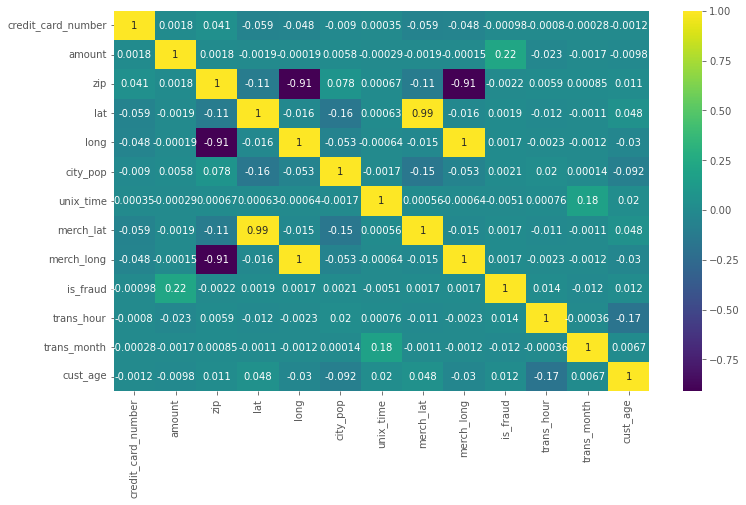

In [23]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(),annot = True, cmap = 'viridis')

### =====================================================================================

### Feature selection and modelling

In [24]:
cols = ['category','amount','gender','city_pop','job','merch_lat','merch_long','trans_hour','trans_month','cust_age']

In [25]:
#Dealing with categorical columns
df.gender = df.gender.map({'M' : 1, 'F' : 0})

In [26]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[['category','job']] = encoder.fit_transform(df[['category','job']])

In [27]:
#Feature selection
X = df[cols].values
Y = df[['is_fraud']].values

In [28]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = StandardScaler().fit(X).transform(X)

In [29]:
#Oversampling for making the data balanced
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE()
x_sampled, y_sampled = smote_sampler.fit_resample(X, Y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (2578338, 10)
Labels :  (2578338,)


In [30]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.25, random_state = 2)

### Testing dataset

In [31]:
#Now, lets clean the testing dataset
df_test.rename(columns={'trans_date_trans_time':'transaction_time',
                         'cc_num':'credit_card_number',
                         'amt':'amount'}, inplace=True)

df_test['transaction_time'] = pd.to_datetime(df_test['transaction_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['trans_hour'] = df_test['transaction_time'].dt.hour
df_test['trans_month'] = df_test['transaction_time'].dt.month
from datetime import datetime
df_test['time'] = df_test['unix_time'].apply(datetime.utcfromtimestamp)
df_test['cust_age'] = (df_test['transaction_time'] - df_test['dob']).astype('timedelta64[Y]')

df_test.gender = df_test.gender.map({'M' : 1, 'F' : 0})
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_test[['category','job']] = encoder.fit_transform(df_test[['category','job']])

In [32]:
X_test = df_test[['category','amount','gender','city_pop','job','merch_lat','merch_long','trans_hour','trans_month','cust_age']]

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_test = StandardScaler().fit(X_test).transform(X_test)

### Applying various models

#### 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [35]:
print('Training Set Accuracy : ', log_reg.score(x_train, y_train))
print('Testing Set Accuracy  : ', log_reg.score(x_test, y_test))

Training Set Accuracy :  0.8552183241603245
Testing Set Accuracy  :  0.853964954195335


In [36]:
pred_train = log_reg.predict(x_train)
pred_test  = log_reg.predict(x_test)

In [37]:
f1_score(y_test, pred_test)

0.8389292522081949

With Logistic Regression we have F1-Score = 0.84

#### 2. Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB  
nb_classifier = GaussianNB()  
nb_classifier.fit(x_train, y_train) 

GaussianNB()

In [40]:
print('Training Set Accuracy : ', nb_classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', nb_classifier.score(x_test, y_test))

Training Set Accuracy :  0.8238011783304279
Testing Set Accuracy  :  0.8231823576409628


In [41]:
pred_train = nb_classifier.predict(x_train)
pred_test  = nb_classifier.predict(x_test)

In [42]:
f1_score(y_test, pred_test)

0.7921995048114966

With Naive Bayes Classifier we have F1-Score = 0.79

#### 3. Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [45]:
print('Training Set Accuracy : ', rf_classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', rf_classifier.score(x_test, y_test))

Training Set Accuracy :  0.9857908429877031
Testing Set Accuracy  :  0.9853006197786173


In [46]:
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

In [47]:
f1_score(y_test, pred_test)

0.9852159408824875

With Random Forest Classifier we have F1-Score = 0.98

#### 4. K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
print('Training Set Accuracy : ', knn_classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', knn_classifier.score(x_test, y_test))

Training Set Accuracy :  0.9969660034140865
Testing Set Accuracy  :  0.995663876757914


In [51]:
pred_train = knn_classifier.predict(x_train)
pred_test  = knn_classifier.predict(x_test)

In [52]:
f1_score(y_test, pred_test)

0.9956861758527714

In [54]:
knn_pred = knn_classifier.predict(X_test)

With KNN Classifier we have F1-Score = 0.99

Hence, KNN classifier is the best model for this problem. We will use this model for prediction on the testing dataset

In [55]:
sample=pd.DataFrame({"Actual Labels":df_test.is_fraud,
             "Predicted Labels":np.round(knn_pred)})
sample

,Actual Labels,Predicted Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555714,0,0
555715,0,0
555716,0,0
555717,0,0


In [56]:
sample.to_csv('Credit card Fraud Detection.csv',index=False)